# Rain Prediction

## Table of Contents:

* Import libraries
* Load data
* Data Visualization
* Data Preprocessing
* Model building
* Conclusion

## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Load dataset

In [13]:
dataset = pd.read_csv(r"C:\AVSCODE\DL\ANN_codes\weatherAUS.csv")
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [16]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
# drop unnecessary columns
dataset.drop(columns = ['Date'], inplace = True)

### Encode Categorical Features

In [22]:
label_encoders = {}

for col in dataset.select_dtypes(include='object'):
    le = LabelEncoder()
    dataset[col] = dataset[col].astype(str)
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

### Handle Missing Values

In [23]:
imputer = SimpleImputer(strategy="mean")
dataset[:] = imputer.fit_transform(dataset)

### Split Features & Target

In [24]:
X = dataset.drop("RainTomorrow", axis=1)
y = dataset["RainTomorrow"]

### Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build ANN Model

In [28]:
model = Sequential()

# input layer
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

# hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation='sigmoid'))

### Compile model

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train ANN Model

In [31]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7973 - loss: 0.4020 - val_accuracy: 0.8179 - val_loss: 0.3063
Epoch 2/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8031 - loss: 0.0453 - val_accuracy: 0.8041 - val_loss: -0.5141
Epoch 3/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7963 - loss: -1.7728 - val_accuracy: 0.8225 - val_loss: -3.5043
Epoch 4/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8040 - loss: -6.6715 - val_accuracy: 0.8195 - val_loss: -10.0344
Epoch 5/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8005 - loss: -14.7014 - val_accuracy: 0.8205 - val_loss: -20.3785
Epoch 6/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7982 - loss: -27.4757 - val_accuracy: 0.8187 - val_loss: -36.0266
Epoch 7/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7921 - loss: -47.5295 - val_accuracy: 0.8125 - val_loss: -58.3077
Epoch 8/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7910

### Training vs Validation Accuracy Graph

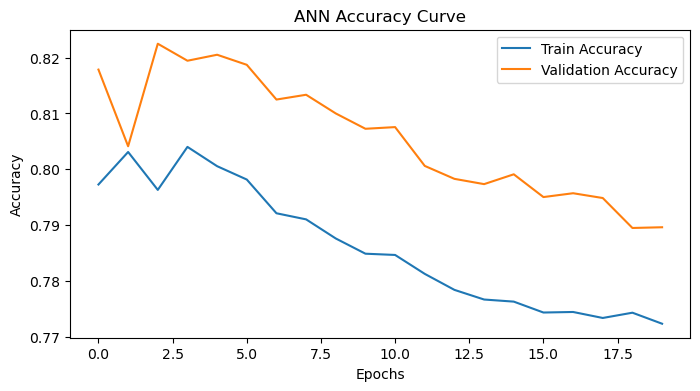

In [32]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ANN Accuracy Curve")
plt.show()

### Model Evaluation

In [33]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test,y_pred))

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step
Accuracy: 0.7850955589165406


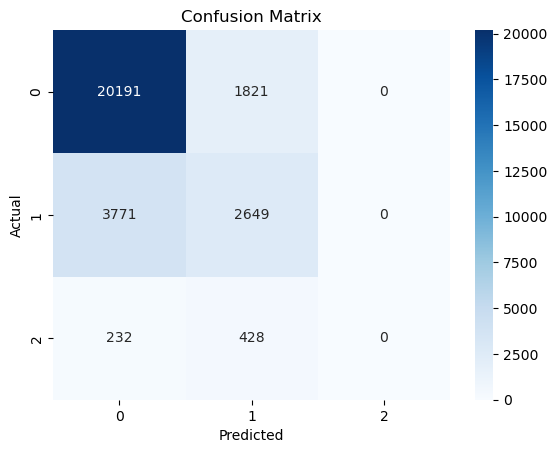

In [34]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     22012
           1       0.54      0.41      0.47      6420
           2       0.00      0.00      0.00       660

    accuracy                           0.79     29092
   macro avg       0.46      0.44      0.45     29092
weighted avg       0.75      0.79      0.76     29092



c:\Users\ankus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ankus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ankus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
